<a href="https://colab.research.google.com/github/kaw84/Algorithms/blob/main/Percolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Percolation model describes whether there is connection between top and bottom of a grid - for example, whether a porous filter allows water to pass. To start, initialize array N by N of blocked sites, include code for opening given site and connecting it with its neighbors. When a site is connected with any of the top sites, water fills it. If water fills any of the sites in the bottom row, the system percolates.

In [193]:
class Percolation2:

  def __init__(self,dimension):
    self.dimension = dimension
    self.grid = np.zeros((dimension, dimension))
    self.id = list(range(dimension**2))

  # what is the index of the site
  def id_index(self, row, col):
    if row == 0:
      return 0
    return row * self.dimension +col

  # opens the site (row, col) if it is not open already
  def open(self, row, col):
    if self.grid[row,col] == 0:
      self.grid[row,col] = 1
      if row > 0 and self.isOpen(row,col) and self.isOpen(row-1, col):
        self.union(row-1, col, row, col)

      if col > 0 and self.isOpen(row,col) and self.isOpen(row, col-1):
        self.union(row, col-1, row, col)

      if col < self.dimension-1 and self.isOpen(row,col) and self.isOpen(row, col+1):
        self.union(row, col, row, col+1)

      if row < self.dimension-1 and self.isOpen(row,col) and self.isOpen(row+1, col):
        self.union(row, col, row+1, col)


  # is the site (row, col) open?
  def isOpen(self, row, col):
    if self.grid[row,col] == 1:
      return True

  def isFull(self,row,col):
    return any([self.root(row,col) == self.root(0,col)])

  # creating root connection between nearest neighbors if they are open
  def union(self, row1, col1, row2, col2):
    pid = self.id[self.id_index(row1,col1)]
    qid = self.id[self.id_index(row2,col2)]
    for i in range(len(self.id)):
      if self.id[i] == qid:
        self.id[i] = pid

  # returns the number of open sites
  def numberOfOpenSites(self):
    return sum(sum(self.grid))

  # gives number of sites
  def numberOfZeros(self):
    return self.dimension**2

  # gives percentage of open sites
  def percentage(self):
    return self.numberOfOpenSites()/self.numberOfZeros() * 100

  # what is the root of a site
  def root(self, row, col):
    i = self.id_index(row,col)
    while i != self.id[i]:
      i = self.id[i]
    return i

  # does the system percolate?
  def percolates(self):
    for i in range(self.dimension-1):
      if self.isFull(self.dimension - 1, i):
        return True
    return False

  # printing the array
  def print(self):
    for row in range(self.dimension):
      print(''.join([str(int(self.grid[row, col])) for col in range(self.dimension)]))

  def mapping(self,row,col):
    if self.isFull(row,col) == True:
      self.grid[row,col] = 2

    # return self.grid





After creating a code, Monte Carlo simulation needs to be used to randomly choose row and columnn and open them. This will allow to calculate what % of sites needs to be open for the percolation to happen. Random samplings helps to obtain the threshold value.

In [206]:
n = 100
percentages = []

for i in range(10):
  data = Percolation2(n)
  while data.percolates() == False:
    row = random.randint(0,n-1)
    col = random.randint(0,n-1)
    data.open(row,col)

  percentages.append(data.percentage())

print(np.mean(percentages))
print(np.std(percentages))


58.621
1.3863653919511985


To visualise system it is useful to plot it as a heatmap. The blocked sitesare visualised as black squares, the open sites as white squares and filled sites as blue squares.

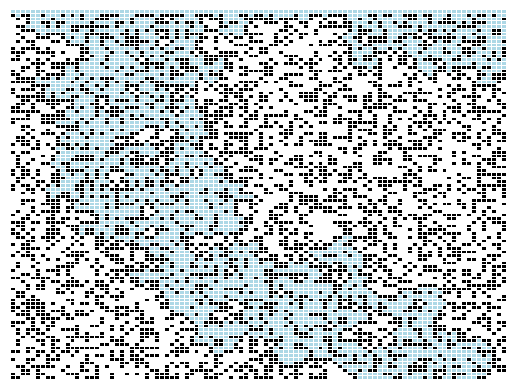

In [207]:
[data.mapping(i, j) for i in range(data.dimension) for j in range(data.dimension)]
cmap_dict = {0: '#000000', 1:'#FFFFFF', 2: '#ADD8E6'}
cmap = ListedColormap([cmap_dict[i] for i in range(3)])
ax = sns.heatmap(data.grid, linewidth=0.5, cbar = False, xticklabels=False, yticklabels=False, cmap=cmap)
plt.show()